<a href="https://colab.research.google.com/github/Adiaarav/Predict_CO2_Emission-PROJECT1/blob/main/Predict_CO2_Emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required libraries for Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Importing file uplaoder from local drive to Googel Colab

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Fuel.csv to Fuel.csv


Read the CSV file

In [3]:
data = pd.read_csv("Fuel.csv")
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Select the features we want to consider in predicting values : Here our goal is to predict the value of “co2 emissions” from the value of “engine size” in our dataset.

In [4]:
data1 = data[["ENGINESIZE","CO2EMISSIONS"]]
data1.head()

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


Plot the data

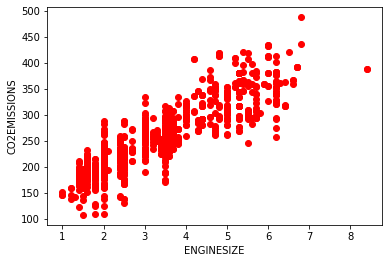

In [5]:
plt.scatter(data1["ENGINESIZE"], data1["CO2EMISSIONS"], color="red")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

Spliting the data into training and test data set (0.75 and 0.25)

In [6]:
X1 = data1.iloc[:,:-1].values
Y1 = data1.iloc[:,1].values
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.25, random_state=42)

Applying Linear Regression model because of only 1 independent variable

In [7]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X1_train,Y1_train)
Y1_pred=reg.predict(X1_test)

Determining Accuracy of Linear Regession

In [8]:
print('Accuracy on training data:{:.3f}'.format(reg.score(X1_train,Y1_train)))
print('Accuracy on test data: {:.3f}'.format(reg.score(X1_test,Y1_test)))

Accuracy on training data:0.763
Accuracy on test data: 0.766


Determining R square value by impoting the library

In [9]:
from sklearn.metrics import r2_score
print('R2 Score {:.3f}'.format(r2_score(Y1_test,Y1_pred)))
print("Reg_coefficient = ",reg.coef_)
print("Reg_intercept = ",reg.intercept_)

R2 Score 0.766
Reg_coefficient =  [38.89375359]
Reg_intercept =  126.62361300856665


Plotting the best fit Line

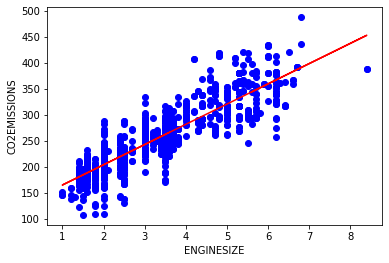

In [10]:
plt.scatter(X1, Y1, color="Blue")
plt.plot(X1_train, X1_train * reg.coef_ + reg.intercept_, '-r')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

Function to predict future values

In [11]:
def predict_linear_reg(X_train_value, coefficient, intercept):
  predicted_value = X_train_value*coefficient + intercept
  return predicted_value
X1_train_value = 4.5
estimated_emmision = predict_linear_reg(X1_train_value, reg.coef_, reg.intercept_)
print(estimated_emmision)

[301.64550416]


Select the features we want to consider in predicting values : Here our goal is to predict the value of “co2 emissions” from the value of ENGINESIZE, CYLINDERS,FUELCONSUMPTION_CITY,	FUELCONSUMPTION_HWY,	FUELCONSUMPTION_COMB,	FUELCONSUMPTION_COMB_MPG,” in our dataset.

In [12]:
data2 = data[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB","FUELCONSUMPTION_COMB_MPG", "CO2EMISSIONS"]]
data2.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


Spliting the data into training and test dataset (0.75 and 0.25)

In [13]:
X2 = data1.iloc[:,:-1].values
Y2 = data1.iloc[:,1].values
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.25, random_state=10)

Applying Logistic Regression because have multiple independent variables

In [14]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
# log_reg.fit(X2_train,Y2_train)
# Y2_pred=log_reg.predict(X2_test)

While running above code we get an error because of poor problem conditioning, so we can try feature scaling, i.e. bring all numbers to same scale by importing the library

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X2_train = sc.fit_transform(X2_train)
X2_test = sc.transform(X2_test)

log_reg.fit(X2_train,Y2_train)
Y2_pred=log_reg.predict(X2_test)

Now we haqve run the exact code after feature scaling 

Determining Accuracy of Logistic Regression 

In [16]:
print("Training Accuracy:{:.3f}".format(log_reg.score(X2_train,Y2_train)))
print('Testing Accuracy:{:.3f}'.format(log_reg.score(X2_test,Y2_test)))

Training Accuracy:0.052
Testing Accuracy:0.026


Since accuracy is so low, we can Confusion Matrix to see results 

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y2_test,Y2_pred)
print(cm)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


I dont understood this results so trying to do Cross Validation

In [18]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(log_reg,X2,Y2,cv=10)
accuracies2 = cross_val_score(log_reg,X2,Y2,cv=5)
print('{:.3f}'.format(accuracies.mean()))
print('{:.3f}'.format(accuracies2.mean()))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown

0.050
0.045


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Again the error promt of Number of Iterations exceeding occured, I dont know what to do in this case

Trying Pipeline Method

In [19]:
from sklearn.pipeline import make_pipeline
clf=make_pipeline(sc,log_reg) 
accuracies=cross_val_score(clf,X2,Y2,cv=10)
print('{:.3f}'.format(accuracies.mean()))


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0.045


Ending Logistic regression, cause am stuck, dont know what to do